In [2]:
from keras.datasets import mnist
import  matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


In [4]:
x_train.shape

(60000, 28, 28)

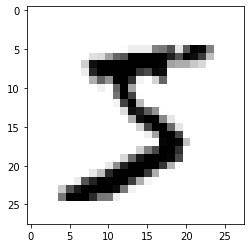

In [5]:
plt.imshow(x_train[0],cmap='gray_r')

In [6]:
from keras.utils.np_utils import to_categorical

In [7]:
y_cat_test = to_categorical(y_test,10)

y_cat_train = to_categorical(y_train,10)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
x_train = x_train/x_train.max()
x_test  = x_test/x_test.max()

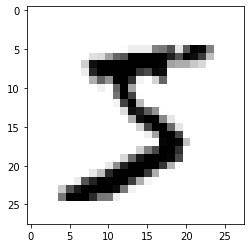

In [10]:
plt.imshow(x_train[0],cmap='gray_r')

In [11]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [12]:
from keras.models import Sequential

In [13]:
from keras.layers import Dense , Conv2D ,MaxPool2D ,Flatten

In [14]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1) , activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 28s 471us/step - loss: 0.1339 - acc: 0.9597
Epoch 2/2
60000/60000 [==============================] - 25s 418us/step - loss: 0.0478 - acc: 0.9853


In [17]:
model.metrics_names

['loss', 'acc']

In [18]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 130us/step


[0.039799190246470974, 0.987]

In [22]:
from sklearn.metrics import classification_report

In [23]:
prediction = model.predict_classes(x_test)

In [24]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       980
          1       1.00      0.99      0.99      1135
          2       0.99      0.98      0.99      1032
          3       0.98      0.99      0.99      1010
          4       0.99      1.00      0.99       982
          5       0.98      0.98      0.98       892
          6       0.99      0.98      0.99       958
          7       0.98      0.99      0.98      1028
          8       0.99      0.98      0.98       974
          9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [22]:
model.save('digit.h5')